In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

torch.manual_seed(1)
np.random.seed(1)

In [2]:
BATCH_SIZE = 64
LR_G = 0.0001
LR_D = 0.0001
N_IDEAS = 5
ART_COMPONENTS = 15
PAINT_POINTS = np.vstack([np.linspace(-1, 1, ART_COMPONENTS) for _ in range(BATCH_SIZE)])

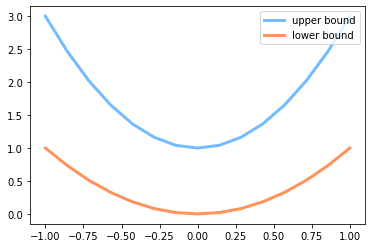

In [3]:
plt.plot(PAINT_POINTS[0], 2*np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
plt.plot(PAINT_POINTS[0], 1*np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
plt.legend(loc='upper right')

In [4]:
def artist_works():
    a = np.random.uniform(1, 2, size=BATCH_SIZE)[:, np.newaxis]
    paintings = a*np.power(PAINT_POINTS, 2) + (a - 1)
    paintings = torch.from_numpy(paintings).float()
    return Variable(paintings)

G = nn.Sequential(
    nn.Linear(N_IDEAS, 128),
    nn.ReLU(),
    nn.Linear(128, ART_COMPONENTS),
)

D = nn.Sequential(
    nn.Linear(ART_COMPONENTS, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid(),
)


In [5]:
opt_D = torch.optim.Adam(D.parameters(), lr = LR_D)
opt_G = torch.optim.Adam(G.parameters(), lr = LR_G)

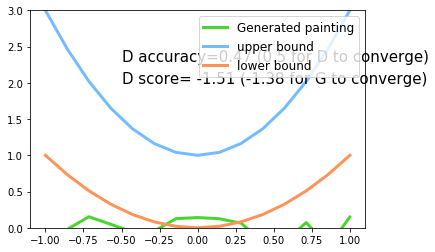

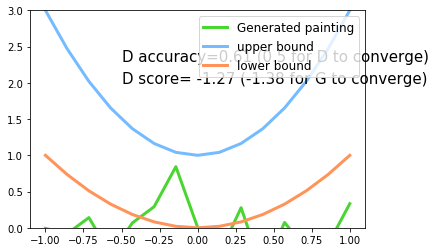

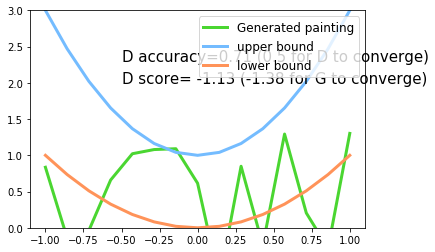

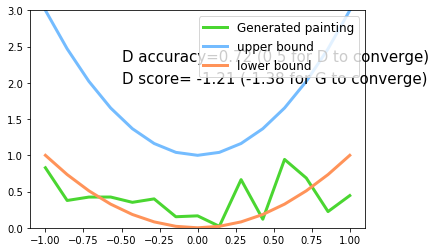

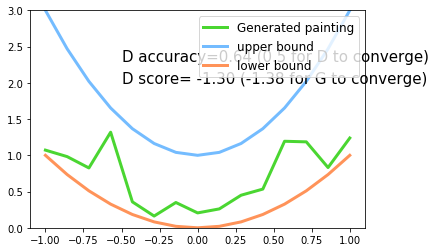

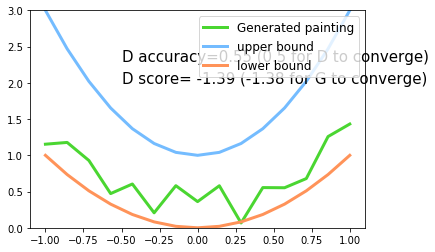

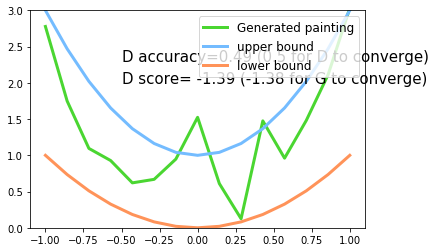

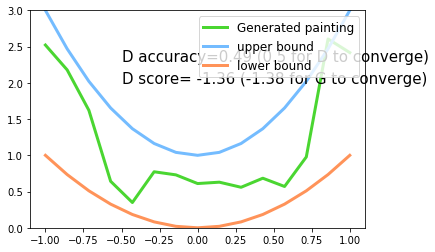

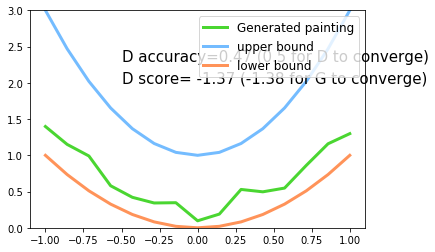

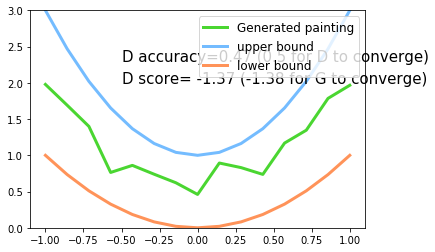

In [6]:
for step in range(1000):
    
#     artist_paintings = artist_works()
#     G_ideas = Variable(torch.randn(BATCH_SIZE, N_IDEAS))
#     G_paintings = G(G_ideas)
    
#     prob_artist0 = D(artist_paintings)
#     prob_artist1 = D(G_paintings)
    
#     D_loss = -torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
#     G_loss = torch.mean(torch.log(1. - prob_artist1))
    
    
    artist_paintings = artist_works()           # real painting from artist
    G_ideas = Variable(torch.randn(BATCH_SIZE, N_IDEAS))    # random ideas
    G_paintings = G(G_ideas)                    # fake painting from G (random ideas)

    prob_artist0 = D(artist_paintings)          # D try to increase this prob
    prob_artist1 = D(G_paintings)               # D try to reduce this prob

    D_loss = - torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
    G_loss = torch.mean(torch.log(1. - prob_artist1))

    
    
    opt_D.zero_grad()
    D_loss.backward(retain_graph=True)       
    opt_D.step()
    
    opt_G.zero_grad()
    G_loss.backward() 
    opt_G.step()
    
    if step % 100 == 0:
        plt.cla()
        plt.plot(PAINT_POINTS[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting',)
        plt.plot(PAINT_POINTS[0], 2 * np.power(PAINT_POINTS[0], 2) + 1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(PAINT_POINTS[0], 1 * np.power(PAINT_POINTS[0], 2) + 0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 15})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 15})
        plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=12);plt.draw();plt.pause(0.01)
        plt.show()